<a href="https://colab.research.google.com/github/intelligent-environments-lab/CityLearn/blob/master/examples/citylearn_ccai_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# CityLearn Tutorial
---

Authors:
*   [Kingsley Nweye](https://kingsleynweye.com), The University of Texas at Austin, [nweye@utexas.edu](mailto:nweye@utexas.edu)
*   [Allen Wu](https://www.linkedin.com/in/allenjeffreywu), The University of Texas at Austin, [allen.wu@utexas.edu](mailto:allen.wu@utexas.edu)
*   [Zoltan Nagy](https://www.caee.utexas.edu/people/faculty/faculty-directory/nagy), The University of Texas as Austin, [nagy@utexas.edu](mailto:nagy@utexas.edu)

This tutorial notebook will help users get acquainted with the [CityLearn](https://www.citylearn.net) OpenAI Gym environment, developed for the easy implementation and benchmarking of control algorithms, e.g., rule-based control, model predictive control (MPC) or deep reinforcement learning (RL) in the demand response, building energy and grid-interactive community domain. By the end of the tutorial, participants will learn about intelligent control algorithms to provide energy flexibility, and acquire familiarity with CityLearn environment for extended use in personal projects.

# Table of Contents
---

> Coming soon 🙂


<a name="overview"></a>
# Overview
---

<!-- In this section, kindly provide a summary of the main contributions of the tutorial notebook. Note that the tutorial should introduce or demonstrate the use of a method, dataset, tool, or technology to address a problem related to climate change. Be clear on the goal of the tutorial and the expected learning outcomes for the users. 

Example contributions include:
*   Leveraging existing libraries, packages, or frameworks to tackle a real-world climate-related challenge using machine learning.
*   Introducing a new climate-related benchmark dataset, applying machine learning methods, and presenting baseline results.
*   Developing new tools or libraries and demonstrating its application to a specific problem in climate change. -->
This workshop will consist of a presentation of the underlying background for CityLearn and its relevance to climate change mitigation. We provide a walk-through tutorial on how to set up and interact with the simulation environment using a realworld dataset from a grid-interactive residential community in Fontana, California. 

This notebook will provide a guide on how to use a simple rule-based control architecture and advanced reinforcement control algorithms to manage batteries in each home in the community with a goal of minizing the cost of purchased electricity, carbon emissions associated with consuming electricity from the grid, as well as improve on ther grid-level KPIs e.g. peak demand, load factor and ramping that are critical for the long-term sustainability of decarbonizing existing power generation sources on the supply side and electrification of buildings on the demand side.

## Contributions
The primary contribution of the CityLearn Workshop is to introduce the software tool CityLearn to model and benchmark simple and advanced control strategies in grid-interactive smart communities, e.g., demand response and load shaping in buildings. The secondary contribution is to bring awareness to datasets for controls research that are provided within the CityLearn environment.

## Learning Outcomes
The primary learning outcome for participants is to gain familiarity with CityLearn environment, its API and dataset offerings for extended use in personal projects. Other secondary outcomes are to:

1. Understand how electrification, distributed energy resources e.g. battery, PV and smart controls provide a promising pathway for decarbonization and energy flexibility.
2. Learn how to design and optimize their own expert RBC for battery management using readily available knowledge of a building's energy use.
3. Identify the challenges surrounding the generalizability of expert systems e.g. RBC and how RL can mitigate these challenges.
4. Optimize their own RL tabular Q-Learning algorithm.
5. Evaluate the performance of standard model-free deep RL algorithms in optimizing KPIs that are targeted at quantifying the have learn about the 
6. Learn the effect of different control algorithms in improving KPIs



<a name="climate-impact"></a>
# Climate Impact
---

<!-- In this section, describe in more detail how the methods or tools introduced in this tutorial could have pathways to positive impact regarding climate change. The problem should be clearly explained and motivated for non-experts. Feel free to discuss relevant research works, real-world examples of successful applications, and/or climate startups or organizations that are making an impact using similar methods or tools to address climate-related challenges. 

We also ask that authors emphasize the real-world impact of the methods, specifically: Who will be using the models/outputs and how will they be used? What decisions will be made based on these models? How will they impact existing systems/the environment/affected communities on the ground? -->

The residential building stock in the United States is responsible for 21% ([Energy Information Administration, 2022](https://www.eia.gov/totalenergy/data/monthly/archive/00352211.pdf)) of energy consumption and 20% of greenhouse gas emissions ([Goldenstein et al., 2020](https://doi.org/10.1073/pnas.1922205117)). Electrification of end-uses, as well as decarbonizing the electrical grid through renewable energy sources such as solar and wind, constitutes the pathway to zero-emission buildings ([Leibowicz et al., 2018](https://doi.org/10.1016/j.apenergy.2018.09.046)). However, electrifying fossil-fueled building end-uses in fact could increase the demand on the existing electricity power grid and if power generation sources are not decarbonized at a similar rate as electrification happening on the demand side, will in fact result in adverse effects of increased green house gas emissions! Also, new grid infrastructure constitutes a significant capital investment and requires extensive planning and execution.

Through distributed energy resources (DER), buildings can provide flexibility services to the existing grid infrastructure in demand response events. On-site solar photovoltaic systems can also reduce dependence on the grid through self-generation. Yet, the intermittency of renewable energy sources introduces additional challenges of grid instability due to a mismatch between electricity generation (supply) and demand ([Suberu et al., 2014](https://doi.org/10.1016/j.rser.2014.04.009)). 

<!-- The California so-called duck-curve is a good illustration of the mismatch in renewable supply and demand, and shows effect of increased PV penetration that may lead to high ramp rate after the sun sets in the evening which the electric power grid may bit be able to handle ([Denholm et al., 2008](https://www.nrel.gov/docs/fy08osti/42305.pdf)). -->

Advanced control algorithms including model-predictive control (MPC) and reinforcement learning control (RLC) are thus, critical to properly manage DERs and even out the supply-demand imbalance brought about by renewable energy sources. However, a major challenge for the adoption of reinforcement learning in grid-interactive efficient buildings is the ability to benchmark control algorithm performance to accelerate their deployment on live systems.

CityLearn ([Vazquez-Canteli et al., 2019](https://doi.org/10.1145/3360322.3360998)) provides a platform for such benchmarking tasks. The different stakeholder in the energy and real-estate market including, utility companies, grid-operators, home-owners and policy makers can utilize CityLearn to make decisions on what control policies are viable and provide the best performance as more controllable distributed energy resources become available.

<!-- Thus, flexible however, these services have to be properly coordinated in execution. When all the electrical loads react simultaneously to the same signals adverse effects can occur such that aggregated electricity peaks are shifted rather than shaved ([Gelazanskas et al., 2014](https://doi.org/10.1016/j.scs.2013.11.001)). Therefore, there is a need for more efficient and effective ways of coordinating the response of building energy systems. -->


<!-- Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for demand response by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. However, a major challenge for the adoption of reinforcement learning in grid-interactive efficient buildings is the ability to benchmark control algorithm performance.  -->



<a name="target-audience"></a>
# Target Audience
---

<!-- Kindly specify the intended target audience for this tutorial notebook. Please be as specific as possible, and feel free to elaborate on their expected background. 

Examples:

*   Climate scientists seeking to explore ML tools, technologies, and resources to tackle a domain-specific problem in climate change. 
*   Data scientists with prior background in deep learning looking for concrete examples on how to tackle climate change using AI. -->

The target audience for this tutorial includes the following:
 - Academic, private and commercial researchers or professionals that are interested in sustainable AI-related pathways to electrification and building decarbonization.
 - AI enthusiasts at any level of expertise whom are drawn to solving control problems or are interested in learning about a new RL environment that deviates from popularized simpler problems to real-world problems with urgency like climate change mitigation and decarbonization of the power infrastructure and building end-uses.

<a name="prereqs"></a>
# Prerequisites
---

> ⚠️ **NOTE**:
> This CityLearn tutorial has a fairly low entry level and participants do not need to have prior experience in RL nor use of the OpenAI-Gym environment standard.

The [BOPTEST tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I) provides a very good overview on some of the topics and methods that we will discuss and apply in this tutorial. While we will briefly provide background on some of these topics and methods, it is encouragedm but not required, that participant in this tutorial first read up the following sections in the [BOPTEST tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I):

- [Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_)
- [The OpenAI-Gym Standard](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=7YnuNAQdM_L2)

Other prerequisites that are technical in nature are:
- Beginner knowledge in Python.
- Some familiarity with the Jupyter Notebook environment.

<a name="background"></a>
# Background
---

## Grid-Interactive Buildings and Energy Flexibility

As buildings become electrified and the penetration of renewable energy source increases, a smart approach to manage and control building loads to ensure that these developments do not bring about grid insecurity is needed. The Department of Energy, introduced the Grid-Interactive Efficient Building (GEB) Initiative to promote the integration of distributed energy resources such as PVs, EVs, active and passive storage systems in buildings that can provide the grid with energy flexibility. A GEB is defined by [[Neukomm et al., 2019](https://www1.eere.energy.gov/buildings/pdfs/75470.pdf)] as:

> [...] an energy-efficient building that uses smart technologies and on-site DERs to provide demand flexibility while co-optimizing for energy cost, grid services, and occupant needs and preferences, in a continuous and integrated way.

GEBs are characterized by their energy efficiency, interconnectivity, smartness and energy flexibility as highlighted in the figure below:

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building-neukomm.png?raw=true"  width="400" alt="The characteristics of a Grid-Interactive Efficient Building (GEB)">
  <figcaption>Figure: The characteristics of a Grid-Interactive Efficient Building (GEB) (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

The energy efficiency of GEBs by means of tighter envelopes and high-quality construction that minimize heat losses lead to reduced loads without the need to make changes to a building's function or for changes in occupan preferences. PV adoption in GEBs provides self-generation capabilities which reduce the net load that will otherwise all be satisfied by the electric grid alone. To then solve the duck-curve problem that is introduced by renewable adoption GEBs are able to shed and/or shift their loads. 

The figure below shows the changes in a building profile as it becomes more efficient, incorporates self generation and provides load shedding and shifting grid services.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building_profile-neukomm.png?raw=true"  width="400" alt="GEB load profiles">
  <figcaption>Figure: GEB load profiles (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

Load shedding and shifting services could be achieved through control of storage systems and other distributed energy resources (DER). These smart controls may adapt to changes in occupant behaviour, weather conditions or respond to external signals e.g. temperature set-point as in the case of demand-response, while maintaining energy efficiency and without causing discomfort to occupants. This adaptability is often referred to as energy flexibility of a building [CITE].

Expert systems e.g. rule-based controller (RBC) are commonly used in to control energy systems. They make use of simple if-else statements in their decision making process. Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for executing grid services by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. Comparatively, RBC and RLC are inexpensive to implement as they have a lower entry bar for domain knowledge of the systems to be controlled. RBC and RLC may perform sub-optimally compared to MPC as they are not modeled after the system under control. However, RL is a data-driven solution and as more training data become available, it achieves comparable performance as MPC. The greatest strength of RLC however, its ability to adapt to changes in the system of building it controls as the dynamics e.g. thermal, occupancy change. We provide more context on reinforcement learning in the following section.

## Reinforcement Learning Control in the context of Grid-Interactive Efficient Buildings

Here we provide a simplified desription of reinforcement learning in the context of GEBs without diving into its theory. For an wider overview of RL, refer to the [BOPTEST Tutorial Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_) and for a thorough introduction, refer to [Sutton and Barto, 2018](http://www.incompleteideas.net/book/the-book.html).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/supervised_vs_unsupervised_vs_rl.png?raw=true"  width="400" alt="Overview of the three machine learning techniques.">
  <figcaption>Figure: Overview of the three machine learning techniques (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

Machine learning techniques are generally characterized as either supervised and unsupervised learning. In supervised learning, the observations, otherwise called samples, and their response, otherwise called target are known. Supervised learning is further classified into regression and classification models where the former learns to predict a continuous variable and the latter learns to predict a discrete class. The supervised machine learning model must then learn the mapping of samples and targets by minimizing a loss function that evaluates the error between predicted targets and actual targets. An example of regression modelling in the context of GEBs is the prediction of a building's electricity consumption (target) when the the weather conditions e.g. dry-bulb temperature and relative humidity, as well as their associated timestamps (samples) are known. An example of a classification model in the context of GEBs is the prediction of if a binary variable such as if building is occupied or not (target) given the same samples as in the regression example. It so happens that these kinds of problems are common in the building energy domain where predicting of a buildings electricity consumption and occupancy can help with scheduling and occupant-centric control to balance efficiency and comfort.

Unsupervised learning on the other hand differs from supervised learning in the sense that the associated targets for the samples are unknown but models can be used to find common patterns amongst samples. This is important especially in exploratory data analysis to draw preliminary conclusions about a new data set and also in situations where the class labels are unknown. An unsupervised model can then be used to infer data-driven class labels that opens on the discussion for new classification models. An example of such application in buildings is the classification of customer load profiles to determine and allocate appropriate tariff plans.

Reinforcement learning (RL) is similar to both supervised and unsupervised learning such that it follows the same idea of learning from observations. However in contrast to supervised learning, there are no known labeled targets. Instead, a model (agent) influences the targets by acting in an environment that rewards actions that have desirable outcomes but penalizes those that lead to adverse outcomes. An example of RL in GEBs is the hourly charging/discharging of a battery (action) with the objective of minimizing the cummulative electricity consumption of a building over a control horizon e.g. a year, given the same sample variables in the supervised learning example (observations) in hourly time steps. These actions affect the hourly electricity consumption of the building (reward). RL is thought of as a trial an error approach because typically, the agent starts off with no prior knowledge of the environment it acts in but learns from experience to associate observations with actions that maximize its rewards. The association is called a control policy.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/reinforcement_learning.png?raw=true"  width="400" alt="Basic structure of reinforcement learning.">
  <figcaption>Figure: Basic structure of reinforcement learning (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

The experiential learning characteristic of RL is very promising for GEBs because it provides a scalable solution to controls as it can adapt to each building's unique conditions and occupant interactions that make up the observations. It also means that the agent need not have a building's dynamics model that can involve a level of complexity that is expensive to design for. [Vazquez-Canteli et al., 2019](https://doi.org/10.1016/j.apenergy.2018.11.002) provide a comprehensive overview of reinforcement learning in the built environment.

<!-- - formalized trial and error with learning
- Refer to BOPTEST tutorial for more details.
- highlight difference from more familiar supervised learning and unsupervised learning (use figure from paper)
- the challenge of rl in buildings as a result of large state and action space.
- introduce DRL. -->

## CityLearn

[CityLearn](https://doi.org/10.1145/3360322.3360998) is an open source OpenAI Gym environment targeted at the easy implementation and benchmarking of simple and advanced control algorithms e.g. rule-based control (RBC) model predictive control (MPC) or deep reinforcement learning control (RLC). It has been utilized in demand response, energy management, voltage regulation and algorithm benchmarking applications (see [references](https://www.citylearn.net/#applications) in the official documention).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/citylearn_systems.png?raw=true"  width="400" alt="An overview of the power sources, energy systems and end-uses in CityLearn v1.7.0 that is used in this tutorial.">
  <figcaption>Figure: An overview of the power sources, energy systems and end-uses in CityLearn v1.7.0 that is used in this tutorial.</figcaption>
</figure>

CityLearn includes simplified energy models of buildings and distributed energy resources (DER) including air-to-water heat pumps, electric heaters and batteries. A collection of buildings energy models make up a virtual district (a.k.a neighborhood or community). In each building, space cooling, space heating and domestic hot water end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water loads can be satisfied through electric heaters.

Buildings may have a combination of thermal storage tanks and batteries to store energy that may be used at peak, high carbon intensity or expensive periods to meet space cooling, space heating, domestic hot water and non-shiftable (plug) loads. These storage devices are charged by the electric device (heat pump or electric heater) that satisfies the end-use the stored energy is for. All electric devices as well as plug loads consume electricity from the main grid. Photovoltaic (PV) arrays may be included in the buildings to offset all or part of the electricity consumption from the grid by allowing the buildings to generate their own electricity.

An RBC, RL or MPC agent(s) control the thermal storage tanks and batteries by determining how much energy to store or release at any given time. CityLearn guarantees that, at any time, the space cooling, space heating, domestic hot water and non-shiftable building loads are satisfied regardless of the actions of the controller by utilizing pre-computed or pre-measured demand of the buildings. An internal backup controller guarantees that the electric devices prioritize satisfying the building loads before storing energy in the storage devices. The backup controller also guarantees that the storage devices do not discharge more energy than is needed to meet the unsatisfied building loads.

CityLearn has been used in the 2020-2022 annual The CityLearn Challenge. The challenge is an opportunity to compete in investigating the potential of AI and distributed control systems to tackle multiple problems within the built-environment domain. It attracts a multidisciplinary participation audience including researchers, industry experts, sustainability enthusiasts and AI hobbyists as a means of crowd-sourcing solutions to these multiple problems.

### CityLearn Aternatives: Similarities and Differences

> Coming soon 🙂

## Other References
 - [CityLearn Documentation](https://www.citylearn.net/index.html)
 - [CityLearn Related References](https://www.citylearn.net/references.html)
 - [Nagy, Zoltan, June Young Park, and José Ramón Vázquez-Canteli. "Reinforcement learning for intelligent environments: A Tutorial." Routledge Handbook of Sustainable and Resilient Infrastructure (2018): 733-746.]()

<a name="software-requirements"></a>
# Software Requirements
---
<!-- Include in this section the software requirements, setup instructions, and library imports. Kindly specify the Python version at the time of submission along with the specific package versions upon installing (e.g. using pip).

Example:

The Python version at the time of this submission in Colab = Python 3.7.14.  -->

The following libraries are required:
* CityLearn
* ipywidgets
* matplotlib
* stable-baselines3

They are installed below:

In [ ]:
%%capture
%pip install CityLearn==1.7.0
%pip install ipywidgets==7.7.2
%pip install matplotlib==3.5.3
%pip install stable-baselines3==1.7.0

We can now import the relevant modules, classes and functions for the remainder of the tutorial:

In [ ]:
# type hinting
from typing import List
from gym import spaces

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# User interaction
from IPython.display import clear_output
from ipywidgets import Button, Checkbox, FloatSlider, FloatText, HBox, IntProgress, ToggleButton

# Data manipulation
import math
import numpy as np
import pandas as pd
import random

# CityLearn
from citylearn.citylearn import CityLearnEnv, StableBaselines3Wrapper
from citylearn.data import DataSet
from citylearn.preprocessing import Normalize, OnehotEncoding, PeriodicNormalization

<a name="data-description"></a>
# Data Description

In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset.
 

## Data Download
Provide instructions on how to retrieve the necessary data. 

This may include bash scripts, Python scripts, or other means of downloading the data.

In [ ]:
dataset_name = 'citylearn_challenge_2022_phase_1'
schema = DataSet.get_schema(dataset_name)
schema['central_agent'] = True

## Data Preprocessing
Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset. 

In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations.

In [ ]:
# Insert data pre-processing and exploratory data analysis
# code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

<a name="methodology"></a>
# Methodology

In this section, describe a step-by-step walkthrough of the methodology, in the form of code cells. Feel free to make use of markdown headings to break this section up into smaller subsections, preferrably one section per task. 

Reminders:
*   Split the code into small, digestible chunks. 
*   Use text cells to describe each code block.
*   Avoid duplicate code through modularization.

## Manually Tuned Rule-Based Controller
Replace the heading with the appropriate title for each subtask.

In [ ]:
class RBC:
    def __init__(self, env: CityLearnEnv, hours: List[int], actions: List[float], loader: IntProgress = None):
        self.env = env
        self.hours = hours
        self.actions = actions
        self.loader = loader

    def learn(self):
        if self.loader is not None:
            self.loader.max = self.env.time_steps
        else:
            pass

        observations = self.env.reset()
        
        while not self.env.done:
            if self.loader is not None:
                self.loader.value += 1
            else:
                pass
            
            actions = self.predict(observations)
            next_observations, _, _, _  = self.env.step(actions)
            observations = [o for o in next_observations]
    
    def predict(self, observations: List[List[float]]) -> List[float]:
        actions = []

        for n, o, s in zip(self.env.observation_names, observations, self.env.action_space):
            hour = o[n.index('hour')]
            a = self.actions[self.hours.index(hour)]
            actions.append([a]*s.shape[0])

        return actions

In [ ]:
def parse_kpis(env: CityLearnEnv):
    kpis = env.evaluate().pivot(index='name', columns='cost_function', values='value').round(3)
    kpis = kpis.reset_index()
    kpis = kpis.to_dict('records')
    return kpis

def plot_profiles(env: CityLearnEnv):
    fig, axs = plt.subplots(3, 1, figsize=(8, 4), sharex=True)
    y1 = env.buildings[0].net_electricity_consumption
    y2 = env.buildings[0].net_electricity_consumption_without_storage
    y3 = env.buildings[0].net_electricity_consumption_without_storage_and_pv
    x = range(env.time_step + 1)
    axs[0].plot(x, y1, label='With storage')
    axs[0].plot(x, y2, label='Without storage')
    axs[0].plot(x, y3, label='Without storage and PV')
    axs[0].set_ylabel('kWh')
    axs[0].set_title('Net electricity consumption')
    axs[0].margins(0)
    axs[0].legend()

    y4 = env.buildings[0].weather.outdoor_dry_bulb_temperature
    axs[1].plot(x, y4)
    axs[1].set_title('Outdoor dry bulb temperature')
    axs[1].set_ylabel('C')
    axs[1].margins(0)

    y5 = np.array(env.buildings[0].cooling_storage.soc)/env.buildings[0].cooling_storage.capacity
    y6 = np.array(env.buildings[0].dhw_storage.soc)/env.buildings[0].dhw_storage.capacity
    y7 = np.array(env.buildings[0].electrical_storage.soc)/env.buildings[0].electrical_storage.capacity
    axs[2].plot(x, y5, label='Cooling storage')
    axs[2].plot(x, y6, label='DHW storage')
    axs[2].plot(x, y7, label='Battery')
    axs[2].set_title('Storage SOC')
    axs[2].set_xlabel('Time step')
    axs[2].set_ylabel('[1]')
    axs[2].margins(0)
    axs[2].legend()

    plt.tight_layout()

    return fig, axs

def plot_building_daily_profile(ixs: List[int], schema: dict):
    column_count_limit = 5
    row_count = math.ceil(len(ixs)/column_count_limit)
    column_count = min(len(ixs), column_count_limit)
    fig, _ = plt.subplots(row_count, column_count, figsize=(4*column_count, 2*row_count))
    env = CityLearnEnv(schema)
    x = list(range(env.time_steps + 1))

    for i, (ax, ix) in enumerate(zip(fig.axes, ixs)):
        y = \
            env.buildings[ix].energy_simulation.non_shiftable_load\
                + env.buildings[ix].energy_simulation.cooling_demand\
                    + env.buildings[ix].energy_simulation.heating_demand\
                        + env.buildings[ix].energy_simulation.dhw_demand\
                            # - env.buildings[ix].pv.get_generation(env.buildings[ix].energy_simulation.solar_generation)
        
        y = np.array_split(y, int(len(x)/24))

        for y_ in y:
            ax.plot(y_, color='grey', alpha=0.5)

        ax.plot(np.mean(y, axis=0), color='red')
        ax.plot(np.mean(y, axis=0) + np.std(y, axis=0), color='green', linestyle='--')
        ax.plot(np.mean(y, axis=0) - np.std(y, axis=0), color='green', linestyle='--')
        ax.margins(0)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
        ax.set_xlabel('Hour')
        ax.set_ylabel('kWh')

- What happens when actions for all hours are set to 0?
- How can we set the RBC so that it takes advantage of solar generation?
- How can we set the RBC so that it takes advantage of times of high coefficient of performance (COP) for the heat pump?

Checkbox(value=True, description='Use PV?', indent=False)

IntProgress(value=0, description='Simulating', max=8760, style=ProgressStyle(bar_color='maroon'))

{'name': 'Building_1', '1 - load_factor': nan, 'average_daily_peak': nan, 'carbon_emissions': 1.067, 'electricity_consumption': 1.067, 'peak_demand': nan, 'pricing': 1.002, 'ramping': nan, 'zero_net_energy': 1.102}
{'name': 'District', '1 - load_factor': 1.003, 'average_daily_peak': 1.292, 'carbon_emissions': 1.067, 'electricity_consumption': 1.067, 'peak_demand': 1.165, 'pricing': 1.002, 'ramping': 1.724, 'zero_net_energy': 1.102}


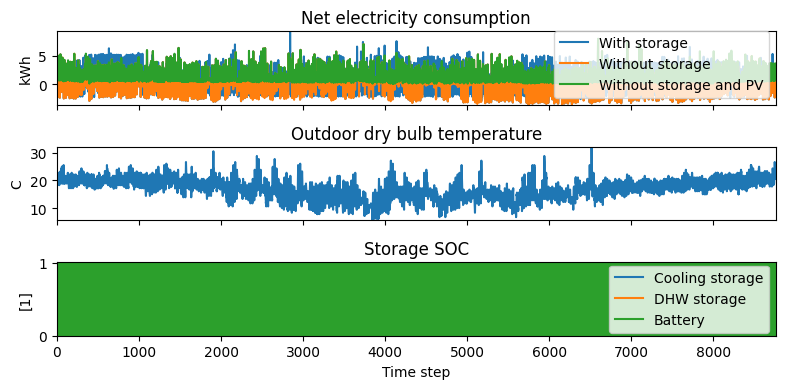

In [ ]:
ACTION_STEP = 0.05
HOUR_STEP = 2
BUILDINGS = [0]
HOURS = list(range(1, 25, HOUR_STEP))
DEFAULT_LOADER_DESCRIPTION = 'Waiting'
sliders = [FloatSlider(
    value=0.0,
    min=-1.0,
    max=1.0,
    step=ACTION_STEP,
    description=f'Hr: {h}-{h + HOUR_STEP - 1}',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
) for h in HOURS]
reset_button = Button(description='Reset', disabled=False, button_style='info', tooltip='Set all hour actions to 0.0', icon='')
random_button = Button(description='Random', disabled=False, button_style='warning', tooltip='Select random hour actions', icon='')
simulate_button = Button(description='Simulate', disabled=False, button_style='success', tooltip='Run simulation', icon='check')
loader = IntProgress(value=0, min=0, max=10, description=DEFAULT_LOADER_DESCRIPTION, bar_style='', style={'bar_color': 'maroon'},orientation='horizontal')
pv_checkbox = Checkbox(value=True, description='Use PV?', indent=False, disabled=False)
sliders_ui = HBox(sliders)
buttons_ui = HBox([reset_button, random_button, simulate_button])

def on_reset_button_clicked(b):
    loader.value = 0
    loader.description = DEFAULT_LOADER_DESCRIPTION

    for s in sliders:
        s.value = 0.0

def on_random_button_clicked(b):
    loader.value = 0
    loader.description = DEFAULT_LOADER_DESCRIPTION
    options = np.arange(-1.0, 1.0, ACTION_STEP)

    for s in sliders:
        
        s.value = round(random.choice(options), 2)

def on_simulate_button_clicked(b):
    loader.description = 'Simulating'
    loader.value = 0
    clear_output(wait=False)
    display(sliders_ui, pv_checkbox, buttons_ui, loader)
    reset_button.disabled = True
    random_button.disabled = True
    simulate_button.disabled = True
    pv_checkbox.disabled = True

    for s in sliders:
        s.disabled = True

    hours = []
    actions = []

    for h, s in zip(HOURS, sliders):
        for i in range(HOUR_STEP):
            hours.append(h + i)
            actions.append(s.value)
    
    env = CityLearnEnv(schema)
    env.buildings = [b for i, b in enumerate(env.buildings) if i in BUILDINGS]

    for b in env.buildings:
        if not pv_checkbox.value:
            b.pv.nominal_power = 0.0
        else:
            continue
        
    agent = RBC(env=env, hours=hours, actions=actions, loader=loader)
    agent.learn()

    # reporting
    kpis = parse_kpis(agent.env)

    for r in kpis:
        print(r)
    
    fig, axs = plot_profiles(agent.env)
    plt.show()

    loader.description = 'Finished'
    reset_button.disabled = False
    random_button.disabled = False
    simulate_button.disabled = False
    pv_checkbox.disabled = False

    for s in sliders:
        s.disabled = False

reset_button.on_click(on_reset_button_clicked)
random_button.on_click(on_random_button_clicked)
simulate_button.on_click(on_simulate_button_clicked)

# preview of building load profile
display(sliders_ui, pv_checkbox, buttons_ui, loader)

## Q-Learning RL Agent
This Q-Learning RL Agent is adapted from the [BOPTEST Tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=9U81QUVcUfoW&line=17&uniqifier=1).

CityLearn observation spaces are all `spaces.Box` thus, are continuous. Our Q-Learning agent uses a table that uses discrete observation values as indices to update the Q-value. We will make a slight modification to the `QLearningAgent` so that it converts our input continuous observations to discrete steps.

In [ ]:
class QLearningAgent:
    def __init__(
        self, 
        env: CityLearnEnv,
        observation_bin_steps: List[List[int]],
        action_bin_steps: List[List[int]],
        eps: float = None,
        eps_min: float = None, 
        eps_decay: float = None,
        alpha: float = None, 
        gamma: float = None
    ):
        self.env = env
        self.observation_bin_steps = observation_bin_steps
        self.action_bin_steps = action_bin_steps
        self.eps = 1.0 if eps is None else eps
        self.eps_init = self.eps
        self.eps_min = 0.01 if eps_min is None else eps_min
        self.eps_decay = 0.0001 if eps_decay is None else eps_decay
        self.alpha = 0.05 if alpha is None else alpha
        self.gamma = 0.9 if gamma is None else gamma
        self.q = self.initialize_q()
        self.rewards = []
        self.kpis = []

    def learn(self, episodes: int = None, deterministic: bool = None):
        deterministic = False if deterministic is None else deterministic
        episodes = 1 if episodes is None else episodes
        
        for i in range(episodes):
            # Initialize enviornment
            done = False
            observations = self.env.reset()
            reward_sum = 0

            while not done:
                print(f'\rEpisode: {i} | Timestep: {self.env.time_step}/{self.env.time_steps}', end=' '*100)
                # Get action with epsilon-greedy policy and simulate
                actions = self.predict(observations, deterministic=False)
                next_observations, reward, done, _ = self.env.step(actions)
                reward_sum += sum(reward)
                
                # Compute temporal difference target and error to udpate q-function
                self.update_q(observations, actions, reward, next_observations)
                
                # Make our next observation the current observation
                observations = [o for o in next_observations]

                # exponential decay
                progress = self.env.time_step*(1 + i)
                self.eps = max(self.eps_min, self.eps_init*np.exp(-self.eps_decay*progress))

            
            self.rewards.append(reward_sum)
            kpis = self.env.evaluate()
            kpis['episode'] = i
            self.kpis.append(kpis)
            # print()
            # print('reward:', reward_sum)
            # print('kpis:', parse_kpis(self.env))

    def update_q(self, observations: List[List[float]], actions: List[List[float]], reward: List[float], next_observations: List[List[float]]):
        # Compute temporal difference target and error to udpate q-function
        discrete_observations = self.discretize_observations(observations)
        discrete_next_observations = self.discretize_observations(next_observations)
        discrete_actions = self.discretize_actions(actions)
        
        for i, (o, a, r, n) in enumerate(zip(discrete_observations, discrete_actions, reward, discrete_next_observations)):
            for j, a_ in enumerate(a):
                td_target = abs(r) + self.gamma*np.max(self.q[i][n][j])
                td_error = td_target - self.q[i][o][j][a_]
                self.q[i][o][j][a_] += self.alpha*td_error

    def predict(self, observations: List[List[float]], deterministic: bool = None) -> List[List[float]]:
        deterministic = False if deterministic is None else deterministic
        actions = None

        if deterministic or np.random.random() > self.eps:
            # Use q-function to decide action
            actions = self.exploit(observations)
        
        else:
            # Explore random action
            actions = self.explore()

        return actions

    def exploit(self, observations: List[List[float]]) -> List[List[float]]:
        actions = []
        choices = self.get_continuous_action_choices()

        for i, (o, c) in enumerate(zip(self.discretize_observations(observations), choices)):
            a = [np.nanargmax(self.q[i][o][j]) for j in range(len(c))]
            a = [c[j][a_] for j, a_ in enumerate(a)]
            actions.append(a)
        
        return actions
        
    def explore(self) -> List[List[float]]:
        actions = []
        choices = self.get_continuous_action_choices()

        for c in choices:
            a = [np.random.choice(c_) for c_ in c]
            actions.append(a)

        return actions

    def initialize_q(self) -> np.ndarray:
        # Initialize q-function as a null function
        q = [None for _ in self.env.observation_space]

        for i, (od, ad) in enumerate(zip(self.get_observations_discretization_bins(), self.get_actions_discretization_bins())):
            od = [len(od_) + 1 for od_ in od]
            shape = od + [len(ad), len(ad[0]) + 1]
            shape = [int(s) for s in shape]
            q[i] = np.zeros(shape=tuple(shape))

        return q

    def get_continuous_action_choices(self):
        continuous_actions = []

        for s, d in zip(self.env.action_space, self.action_bin_steps):
            b = [np.arange(s.low[i], s.high[i] + d[i], d[i]) for i in range(len(d))]
            continuous_actions.append(b)

        return continuous_actions

    def discretize_actions(self, actions: List[List[float]]):
        bins = self.get_actions_discretization_bins()
        discrete_actions = [tuple([np.digitize(a_, bins=b_) for a_, b_ in zip(a, b)]) for a, b in zip(actions, bins)]

        return discrete_actions

    def discretize_observations(self, observations: List[List[float]]):
        bins = self.get_observations_discretization_bins()
        discrete_observations = [tuple([np.digitize(o_, bins=b_) for o_, b_ in zip(o, b)]) for o, b in zip(observations, bins)]

        return discrete_observations

    def get_observations_discretization_bins(self) -> List[np.ndarray]:
        discretization_bins = []

        for s, d in zip(self.env.observation_space, self.observation_bin_steps):
            b = [np.arange(s.low[i] + d[i], s.high[i] + d[i], d[i]) for i in range(len(d))]
            discretization_bins.append(b)

        return discretization_bins
        
    def get_actions_discretization_bins(self) -> List[np.ndarray]:
        discretization_bins = []

        for s, d in zip(self.env.action_space, self.action_bin_steps):
            b = [np.arange(s.low[i] + d[i], s.high[i] + d[i], d[i]) for i in range(len(d))]
            discretization_bins.append(b)

        return discretization_bins

In [ ]:
env = CityLearnEnv(schema)
env.buildings = [b for i, b in enumerate(env.buildings) if i in BUILDINGS]
active_observations = {
    'hour': 1, 
    # 'carbon_intensity': 0.001, 
    'solar_generation': 10,
    # 'electrical_storage_soc': 0.05,
    'non_shiftable_load': 0.1,
    # 'electricity_pricing': 0.15, 
    # 'electricity_pricing_predicted_6h': 0.15,
}
for b in env.buildings:
    b.observation_metadata = {k: True for k in active_observations}
    b.observation_space = b.estimate_observation_space()

    # for i, a in enumerate(b.active_observations):
    #     print(a, b.observation_space.low[i], b.observation_space.high[i])

observation_bin_steps = [list(active_observations.values()) for _ in env.observation_space]
action_bin_steps = [[0.05 for _ in s.low] for s in env.action_space]
agent = QLearningAgent(env, observation_bin_steps, action_bin_steps)
agent.learn(episodes=100)

# eps_decay = [0.0001, 0.00001]
# gamma = np.arange(0.1, 1.0, 0.1)
# alpha = [0.1, 0.01, 0.001, 0.0001, 0.00001]
# for e in eps_decay:
#     for g in gamma:
#         for a in alpha:
#             params = {'eps_decay': e, 'gamma': g, 'alpha': a}
#             agent = QLearningAgent(env, observation_discretization, action_discretization, **params)
#             agent.learn(episodes=10)
#             print(params, np.mean(agent.rewards[-1]))

In [ ]:
# action_space_index:hour_index:action_device_index:action_value_index
# len(agent.q[0][0][0])

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(agent.rewards)
plt.show()
display(agent.env.evaluate())

In [ ]:
for i in range(24):
    a = agent.q[0][i][0]
    n = np.argmax(a)
    m = max(a)
    print(i, n, m)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
agent.learn(episodes=1, deterministic=True)

,cost_function,value,name,level
0,1 - load_factor,1.003716,District,district
1,average_daily_peak,1.043218,District,district
2,carbon_emissions,1.011045,District,district
3,electricity_consumption,1.010819,District,district
4,peak_demand,1.089964,District,district
5,pricing,1.009740,District,district
6,ramping,1.071685,District,district
7,zero_net_energy,1.006317,District,district
8,electricity_consumption,1.010819,Building_1,building
9,zero_net_energy,1.006317,Building_1,building


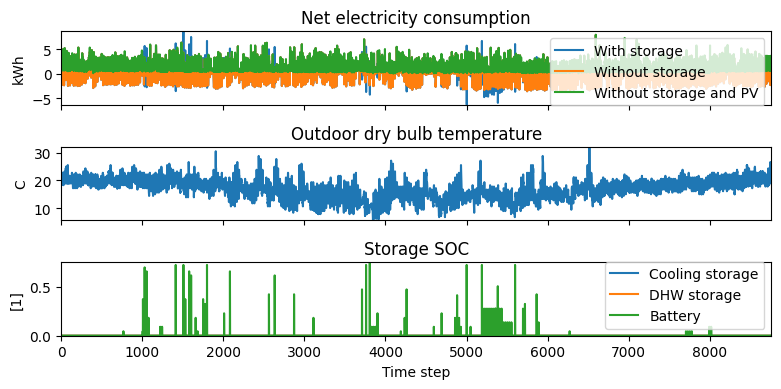

In [ ]:
plot_profiles(agent.env)
agent.env.evaluate()

In [ ]:
agent.q[0][16][0]

array([-116.64219697, -117.39846831, -117.34819237, -117.09319357,
       -117.1799557 , -117.23756293, -117.2908215 , -116.72371954,
       -116.71140242, -117.04626407, -117.11593945, -117.06051091,
       -117.19013563, -117.10479779, -116.90782128, -116.80892286,
       -116.82551824, -116.90028725, -116.95560019, -117.17546893,
       -117.43709906, -117.74508185, -117.37218634, -116.65917642,
       -118.1237493 , -116.9384902 , -116.84002177, -116.74198075,
       -120.62142456, -116.88717359, -120.90040752, -119.47806022,
       -117.8501887 , -118.36982451, -117.23169831, -117.58397427,
       -118.0111974 , -116.91355529, -117.08936821, -117.7612278 ,
       -117.246257  ])

## Deep Q-Learning RL Agent

<a name="results-and-discussion"></a>
# Results & Discussion

In this section, describe your results. Briefly describe the performance metrics and cross validation techniques used. 

In [ ]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

Finally, include a discussion on the limitations and important takeaways from the exercise.

## Limitations
*   ML algorithms and datasets can reinforce or reflect unfair biases. Reflect on the potential biases in the dataset and/or analysis presented in your tutorial, including its potential societal impact, and discuss how you might go about addressing this challenge. 

## Next Steps
*   What do you imagine would be the next steps for your readers after finishing your tutorial?
*   Discuss other potential climate-related applications for the method or tool discussed in the tutorial.
*   Do you know of other climate-related datasets similar to the one used in this tutorial? List them here.

<a name="references"></a>
# References

*   EarthCube Notebook Template: https://github.com/earthcube/NotebookTemplates
*   Earth Engine Community Tutorials Style Guide: https://developers.google.com/earth-engine/tutorials/community/styleguide#colab
*   Google Cloud Community Tutorial Style Guide: https://cloud.google.com/community/tutorials/styleguide
*   Rule A, Birmingham A, Zuniga C, Altintas I, Huang S-C, Knight R, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLoS Comput Biol 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007




# Submitting the Tutorial
*(Please remove this section from your final tutorial submission.)*

If you are using Google Colab, make sure to change the permissions by clicking "Share" (upper right corner of the notebook) >> Change permissions to "Anyone on the internet with this link can comment". 

For additional questions, please feel free to contact:
*   climatechangeai.neurips2022@gmail.com
*   tutorials@climatechange.ai